In [1]:
%run ./Vlad_Dissertation.ipynb

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
/tmp/ipykernel_14693/1247435164.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


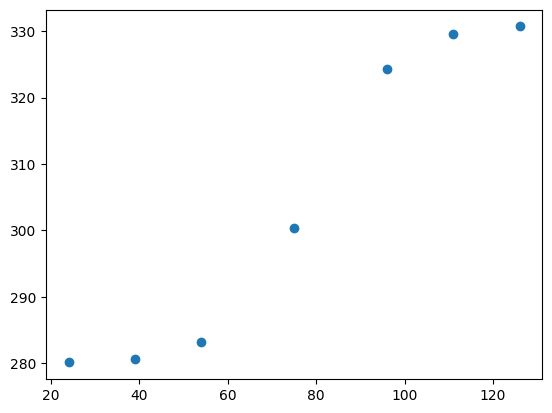

In [2]:
a_distances = np.array([24, 39, 54, 75, 96, 111, 126])

##Pre-Training
###Healthy Controls
ymin = 280
ymax = 331
fprHCCP = 120 - 1.377 * 30
fprHCS = 1 / 0.11  # negative

HC_RTs = RTsig(a_distances, fprHCCP, fprHCS)
plt.scatter(a_distances, HC_RTs)

In [3]:
from scipy.optimize import differential_evolution

HCLt, HCLa, HCLv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(1.275, 2, 1.275, 2, 1.275, 2)


def boundaryhcmodelrun(theta):
    HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
        6.5, 6.5, 6.5, 6.55, 6.55, 6.55, theta[0], theta[1], theta[2], theta[3]
    )  # feedforward and feedback
    _, _, _, _, HCrt = experiment(
        0.4,
        200,
        a_distances,
        5,
        HCLt,
        HCLa,
        HCLv,
        HCWt,
        HCWa,
        HCWv,
        HCBt,
        HCBa,
        HCBv,
        HCWat,
        HCWvt,
        HCWav,
        0,
        0,
    )

    xf = HCrt
    yf = HC_RTs

    m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
        xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
    )
    bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

    if bias < 0:
        bias = 0
    if m < 0:
        m = 0

    cost = np.sum(np.square(np.divide(yf - (m * xf + bias), yf)))

    return cost * 100000


bounds = [(1, 50), (500, 1000), (20, 80), (0.25, 1)]  # k1, k2, lim, alpha
boundaryhcres = differential_evolution(
    boundaryhcmodelrun, bounds, disp=True, workers=-1, updating="deferred"
)

differential_evolution step 1: f(x)= 4.820658815273768
differential_evolution step 2: f(x)= 4.820658815273768
differential_evolution step 3: f(x)= 4.820658815273768
differential_evolution step 4: f(x)= 2.6825347948087446
differential_evolution step 5: f(x)= 2.6825347948087446
differential_evolution step 6: f(x)= 1.932568071616434
differential_evolution step 7: f(x)= 1.932568071616434
differential_evolution step 8: f(x)= 1.932568071616434
differential_evolution step 9: f(x)= 1.932568071616434
differential_evolution step 10: f(x)= 1.3882334871110478
differential_evolution step 11: f(x)= 1.3882334871110478
differential_evolution step 12: f(x)= 1.0206462365534927
differential_evolution step 13: f(x)= 1.0206462365534927
differential_evolution step 14: f(x)= 0.9947595981799117
differential_evolution step 15: f(x)= 0.9947595981799117
differential_evolution step 16: f(x)= 0.9947595981799117
differential_evolution step 17: f(x)= 0.9947595981799117
differential_evolution step 18: f(x)= 0.9947595

In [5]:
print(boundaryhcres)

             message: Optimization terminated successfully.
             success: True
                 fun: 0.9947595981799117
                   x: [ 1.035e+01  6.045e+02  6.337e+01  7.194e-01]
                 nit: 42
                nfev: 2585
          population: [[ 1.035e+01  6.045e+02  6.337e+01  7.194e-01]
                       [ 8.818e+00  5.879e+02  6.452e+01  7.104e-01]
                       ...
                       [ 9.730e+00  5.452e+02  6.347e+01  7.125e-01]
                       [ 9.867e+00  6.232e+02  6.385e+01  7.173e-01]]
 population_energies: [ 9.948e-01  9.948e-01 ...  9.948e-01  9.948e-01]


In [6]:
## Fitted model

HCLt, HCLa, HCLv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(1.275, 2, 1.275, 2, 1.275, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.035e01, 6.045e02, 6.337e01, 7.194e-01
)
_, _, _, _, HC_Model_RTs = experiment(
    0.4,
    200,
    a_distances,
    5,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

HC_Model_RTs = fit_RT(HC_Model_RTs, HC_RTs)

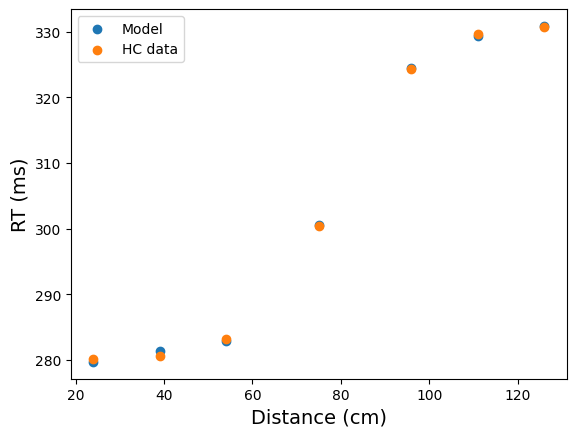

In [20]:
plt.scatter(a_distances, HC_Model_RTs, label="Model")
plt.scatter(a_distances, HC_RTs, label="HC data")
plt.ylabel("RT (ms)", size=14)
plt.xlabel("Distance (cm)", size=14)
plt.legend(prop={"size": 12})
plt.legend()